<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import display, Javascript
from IPython.display import clear_output
from google.colab.output import eval_js
from base64 import b64decode
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt
from time import sleep
%matplotlib inline




In [0]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  resp = urllib.request.urlopen(data)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  
  return image

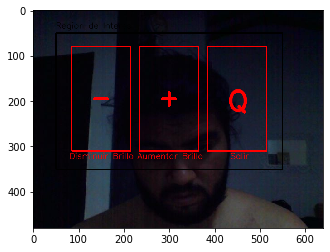

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [11]:
#plt.figure(figsize=(10,10))

while True:
  img = take_photo()

  cv2.flip(img,1)#gira el frame para no trabajar con efecto espejo
  roi = img [0:400,0:600]#se define una region de interes de 400*600 pixeles

  gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)#la region de interes se pasa a gris y se almacena en la variable gray
  gray_blur = cv2.GaussianBlur(gray,(7,7),0)#filtro gaussiano para eliminar ruido del frame 

  '''
  Figuras en la imagen
  '''

  #se crea la region de interes (rectangulo externo)
  roi = cv2.rectangle(roi,(50,50),(550,350),(0,0,0),thickness =2, lineType=8, shift=0)#recuadro
  cv2.putText(roi,"Region de Interes",(50,40), cv2.FONT_ITALIC,0.6,(0,0,0),1,cv2.LINE_AA)#texto
  #recuadro 1 (disminuir brillo)
  roi = cv2.rectangle(roi,(85,80),(215,310),(255,0,0),thickness =2, lineType=8, shift=0)#recuadro
  roi = cv2.line(roi,(135,195),(165,195),(255,0,0),5,8)#linea(simbolo menos)
  cv2.putText(roi,"Disminuir Brillo",(80,327), cv2.FONT_ITALIC,0.6,(255,0,0),1,cv2.LINE_AA)#texto
  #recuadro 2 (Aumentar brillo)
  roi = cv2.rectangle(roi,(235,80),(365,310),(255,0,0),thickness =2, lineType=8, shift=0)#recuadro
  roi = cv2.line(roi,(285,195),(315,195),(255,0,0),5,8)#linea(simbolo mas)
  roi = cv2.line(roi,(300,180),(300,210),(255,0,0),5,8)#linea(simbolo mas)
  cv2.putText(roi,"Aumentar Brillo",(230,327), cv2.FONT_ITALIC,0.6,(255,0,0),1,cv2.LINE_AA)#texto
  #recuadro 3 (Salir Aplicacion)
  roi = cv2.rectangle(roi,(385,80),(515,310),(255,0,0),thickness =2, lineType=8, shift=0)#recuadro
  cv2.putText(roi,"Salir",(435,327), cv2.FONT_ITALIC,0.6,(255,0,0),1,cv2.LINE_AA)#texto
  cv2.putText(roi,"Q",(430,220), cv2.FONT_ITALIC,2,(255,0,0),5,cv2.LINE_AA)#Q central en el recuadro

  #se detecta el patron
  circulos = cv2.HoughCircles(gray_blur,cv2.HOUGH_GRADIENT,1,700,param1=150,param2=50,minRadius=10,maxRadius=70)
  
  clear_output()
  plt.imshow(img)
  plt.show()
  sleep(1)
  
  
  
   
 
  